In [25]:
from bayesian_model import GPSparseBayesModel
from data_loader import data_loader
from utils import ause, return_replicates
from utils import permutation_test_ause
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [26]:
datasets = data_loader()

In [31]:
def run_simulation(dataset, kernel, loss):
    X, y = datasets[dataset]
    replicates = return_replicates(X, y)
    for X_train, X_test, y_train, y_test in replicates:
        model = GPSparseBayesModel(**{"random_seed": 7200, 
                                      "induced_points_method": "random", 
                                      "num_induced_samples": 'sqrt', 
                                      "kernel": kernel,
                                      "loss": loss
                                    })
        model.after_setup()
        X_train, X_test = np.array(X_train), np.array(X_test)
        y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()
        model.train(X_train, y_train)
        pred_probs, pred_var, pred_labels = model.test(X_test, None)
        accuracy = accuracy_score(y_test, np.where(pred_probs > 0.5, 1, 0))
        f1 = f1_score(y_test, np.where(pred_probs > 0.5, 1, 0))
        pred_ause = ause(pred_probs, pred_var, pred_labels)[0]
        results['dataset'].append(dataset)
        results['kernel'].append(kernel)
        results['loss'].append(loss)
        results['ause'].append(pred_ause)
        results['accuracy'].append(accuracy)
        results['f1'].append(f1)
        print(results)

In [34]:
kernels = ['rbf', 'linear', 'poly']
losses = ['trace_elbo', 'trace_meanfield_elbo']
dataset_names = list(datasets.keys())

results = {
    'dataset': [],
    'kernel': [],
    'loss': [],
    'ause': [],
    'ece': [],
    'accuracy': [],
    'f1': []
}

for dataset, kernel, loss in itertools.product(dataset_names, kernels, losses):
    run_simulation(dataset, kernel, loss)

{'dataset': ['diabetes'], 'kernel': ['rbf'], 'loss': ['trace_elbo'], 'ause': [1.3847387491072726e-06], 'ece': [], 'accuracy': [0.3645833333333333], 'f1': [0.5271317829457365]}
{'dataset': ['diabetes', 'diabetes'], 'kernel': ['rbf', 'rbf'], 'loss': ['trace_elbo', 'trace_elbo'], 'ause': [1.3847387491072726e-06, 8.101944760530165e-08], 'ece': [], 'accuracy': [0.3645833333333333, 0.375], 'f1': [0.5271317829457365, 0.5081967213114754]}
{'dataset': ['diabetes', 'diabetes', 'diabetes'], 'kernel': ['rbf', 'rbf', 'rbf'], 'loss': ['trace_elbo', 'trace_elbo', 'trace_meanfield_elbo'], 'ause': [1.3847387491072726e-06, 8.101944760530165e-08, 0.1439964041237038], 'ece': [], 'accuracy': [0.3645833333333333, 0.375, 0.75], 'f1': [0.5271317829457365, 0.5081967213114754, 0.6571428571428571]}
{'dataset': ['diabetes', 'diabetes', 'diabetes', 'diabetes'], 'kernel': ['rbf', 'rbf', 'rbf', 'rbf'], 'loss': ['trace_elbo', 'trace_elbo', 'trace_meanfield_elbo', 'trace_meanfield_elbo'], 'ause': [1.3847387491072726e-

KeyboardInterrupt: 

#### Special case for aleatoric uncertainty

In [100]:
data3 = pd.read_csv('data/winequality-red.csv', sep=";")
data3['label'] = data3['quality'] > 5
data3['label'] = data3['label'].astype(int)

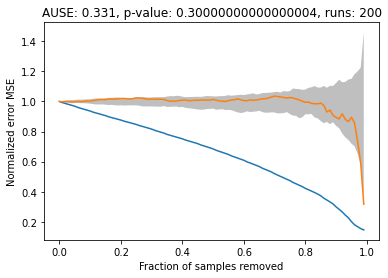

In [84]:
X, y = data3[data3.columns[:-2]], data3['label']
pred_probs, pred_variances, pred_labels = process_data(X, y)
permutation_test(pred_probs, pred_variances, pred_labels)